<a href="https://colab.research.google.com/github/Hbrand03/Intro_to_ML_Work/blob/main/Homework_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Problem 1

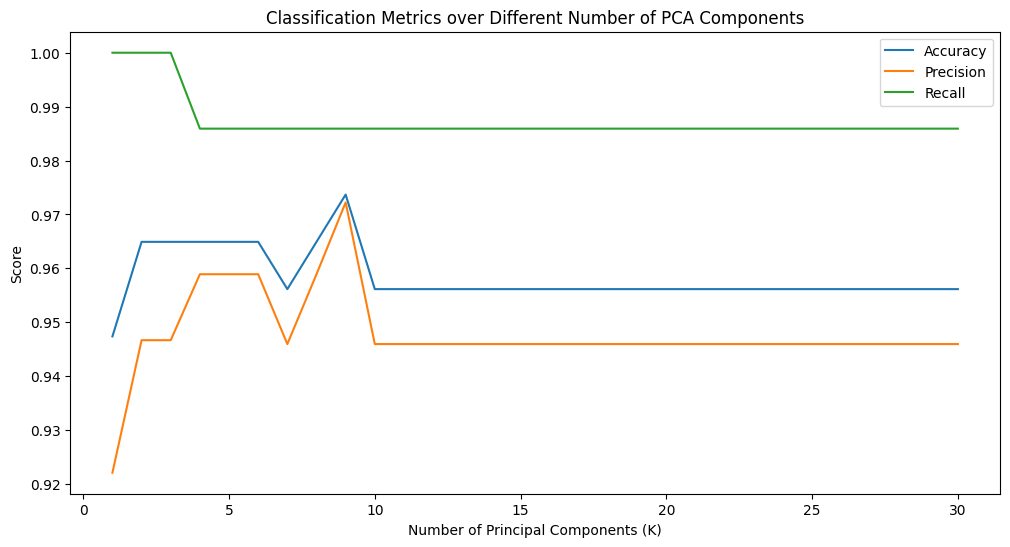

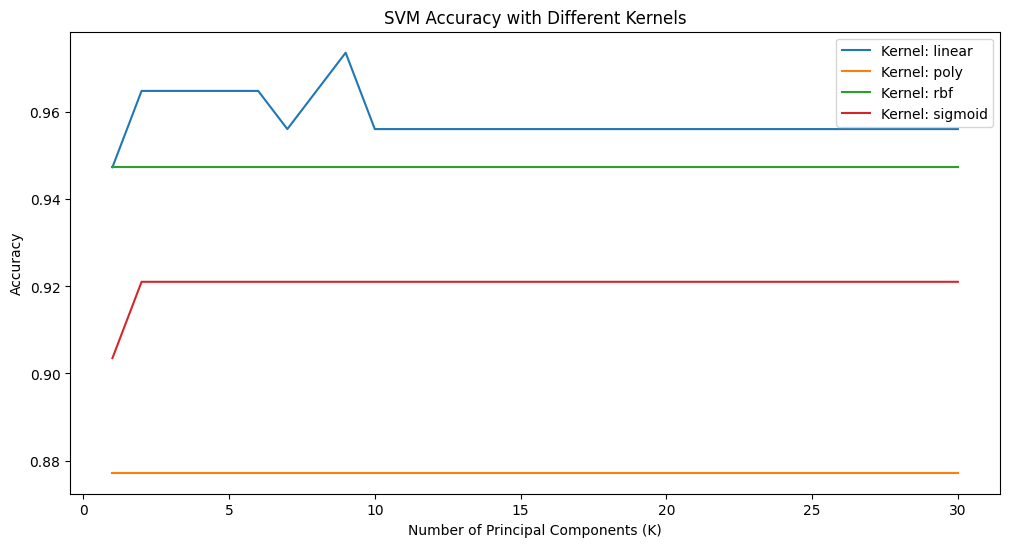

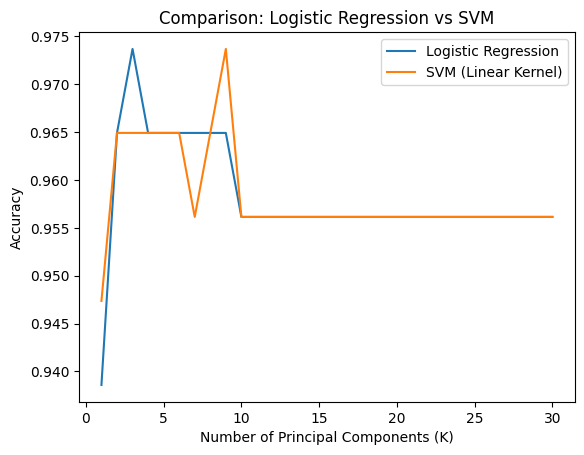

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer

# Load and split the cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize lists to store results
max_components = X.shape[1]
accuracies = []
precisions = []
recalls = []
components_range = range(1, max_components + 1)

# Run PCA and SVM with a linear kernel for different numbers of components (K)
for k in components_range:
    # Apply PCA
    pca = PCA(n_components=k)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)

    # Train SVM with linear kernel
    svm = SVC(kernel='linear')
    svm.fit(X_train_pca, y_train)

    # Make predictions and evaluate
    y_pred = svm.predict(X_test_pca)
    accuracies.append(accuracy_score(y_test, y_pred))
    precisions.append(precision_score(y_test, y_pred))
    recalls.append(recall_score(y_test, y_pred))

# Plot Accuracy, Precision, and Recall over different numbers of PCA components
plt.figure(figsize=(12, 6))
plt.plot(components_range, accuracies, label='Accuracy')
plt.plot(components_range, precisions, label='Precision')
plt.plot(components_range, recalls, label='Recall')
plt.xlabel('Number of Principal Components (K)')
plt.ylabel('Score')
plt.legend()
plt.title('Classification Metrics over Different Number of PCA Components')
plt.show()

# Explore different kernel tricks
kernel_types = ['linear', 'poly', 'rbf', 'sigmoid']
kernel_accuracies = {kernel: [] for kernel in kernel_types}

for kernel in kernel_types:
    for k in components_range:
        pca = PCA(n_components=k)
        X_train_pca = pca.fit_transform(X_train)
        X_test_pca = pca.transform(X_test)

        # Train SVM with different kernels
        svm = SVC(kernel=kernel)
        svm.fit(X_train_pca, y_train)

        # Evaluate and store results
        y_pred = svm.predict(X_test_pca)
        kernel_accuracies[kernel].append(accuracy_score(y_test, y_pred))

# Plot SVM Accuracy with Different Kernels
plt.figure(figsize=(12, 6))
for kernel in kernel_types:
    plt.plot(components_range, kernel_accuracies[kernel], label=f'Kernel: {kernel}')
plt.xlabel('Number of Principal Components (K)')
plt.ylabel('Accuracy')
plt.legend()
plt.title('SVM Accuracy with Different Kernels')
plt.show()

# Logistic Regression Comparison
logistic_accuracies = []
for k in components_range:
    pca = PCA(n_components=k)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)

    # Train Logistic Regression
    log_reg = LogisticRegression(max_iter=10000)
    log_reg.fit(X_train_pca, y_train)

    # Evaluate and store accuracy
    y_pred = log_reg.predict(X_test_pca)
    logistic_accuracies.append(accuracy_score(y_test, y_pred))

# Comparison Plot: Logistic Regression vs SVM
plt.plot(components_range, logistic_accuracies, label='Logistic Regression')
plt.plot(components_range, accuracies, label='SVM (Linear Kernel)')
plt.xlabel('Number of Principal Components (K)')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Comparison: Logistic Regression vs SVM')
plt.show()


Problem 2

<ipython-input-4-608acf26618f>:15: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace({'yes': 1, 'no': 0}, inplace=True)


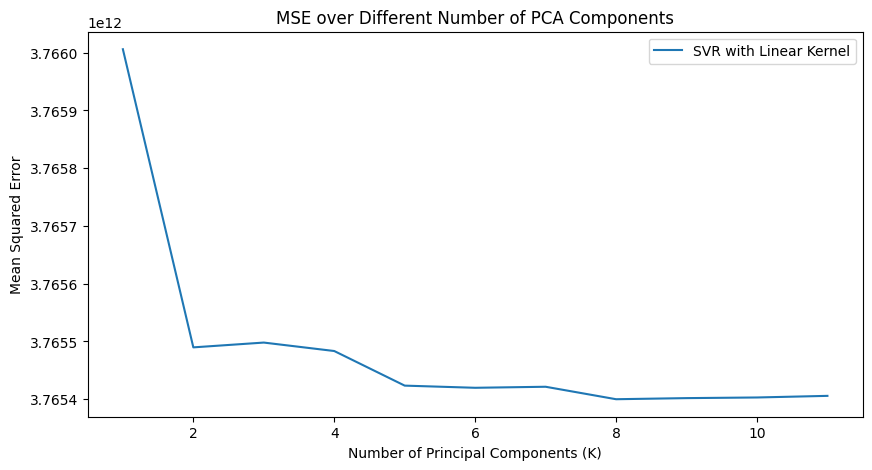

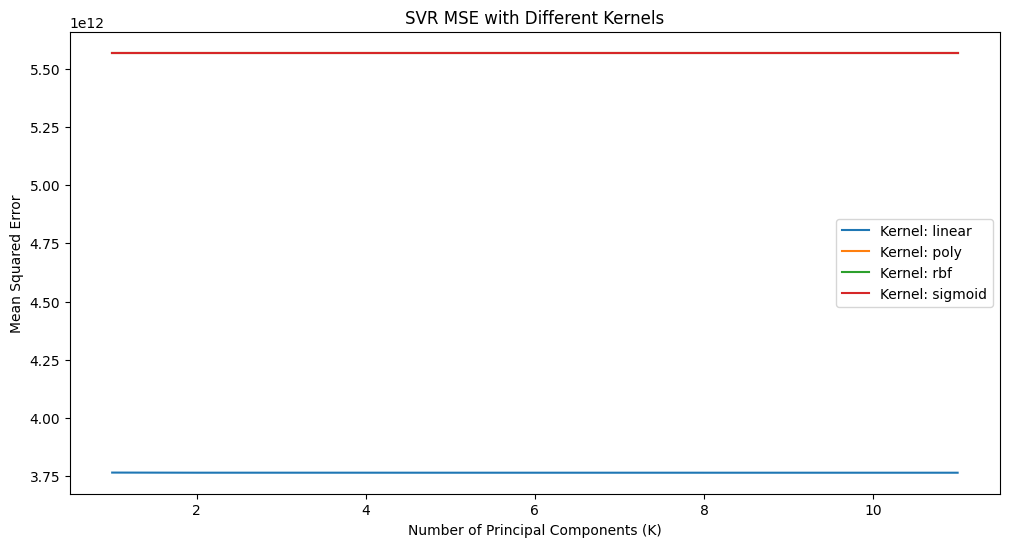

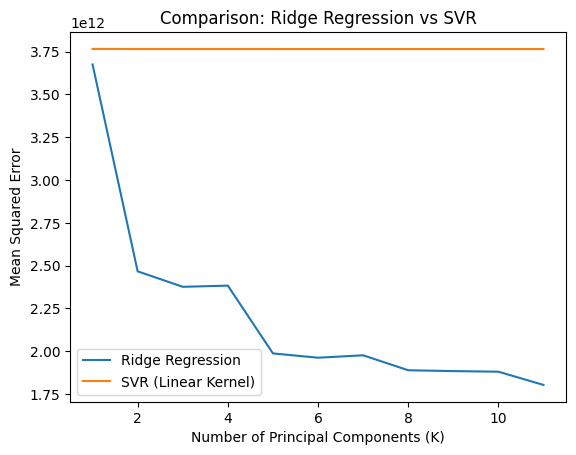

In [4]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.svm import SVR
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load the dataset directly from the URL
url = 'https://raw.githubusercontent.com/HamedTabkhi/Intro-to-ML/refs/heads/main/Dataset/Housing.csv'
data = pd.read_csv(url)

# Convert categorical features to binary (e.g., 'yes'/'no' to 1/0)
data.replace({'yes': 1, 'no': 0}, inplace=True)

# Define features and target variable
features = ['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom',
            'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea']
X = data[features]
y = data['price']  # Target variable

# Split data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize variables to store results
max_components = X.shape[1]  # Maximum number of principal components
mse_scores = []
components_range = range(1, max_components + 1)

# SVR with PCA: Try different numbers of principal components (K)
for k in components_range:
    # Apply PCA
    pca = PCA(n_components=k)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)

    # Train SVR with linear kernel
    svr = SVR(kernel='linear')
    svr.fit(X_train_pca, y_train)

    # Predict and calculate MSE
    y_pred = svr.predict(X_test_pca)
    mse_scores.append(mean_squared_error(y_test, y_pred))

# Plot MSE vs Number of Principal Components
plt.figure(figsize=(10, 5))
plt.plot(components_range, mse_scores, label='SVR with Linear Kernel')
plt.xlabel('Number of Principal Components (K)')
plt.ylabel('Mean Squared Error')
plt.title('MSE over Different Number of PCA Components')
plt.legend()
plt.show()

# Explore Different Kernel Tricks
kernel_types = ['linear', 'poly', 'rbf', 'sigmoid']
kernel_mse_scores = {kernel: [] for kernel in kernel_types}

for kernel in kernel_types:
    for k in components_range:
        pca = PCA(n_components=k)
        X_train_pca = pca.fit_transform(X_train)
        X_test_pca = pca.transform(X_test)

        # Train SVR with the specified kernel
        svr = SVR(kernel=kernel)
        svr.fit(X_train_pca, y_train)

        # Predict and calculate MSE
        y_pred = svr.predict(X_test_pca)
        kernel_mse_scores[kernel].append(mean_squared_error(y_test, y_pred))

# Plot SVR MSE with Different Kernels
plt.figure(figsize=(12, 6))
for kernel in kernel_types:
    plt.plot(components_range, kernel_mse_scores[kernel], label=f'Kernel: {kernel}')
plt.xlabel('Number of Principal Components (K)')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.title('SVR MSE with Different Kernels')
plt.show()

# Comparison with Ridge Regression (Regularized Linear Regression)
ridge_mse_scores = []
for k in components_range:
    pca = PCA(n_components=k)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)

    # Train Ridge Regression model
    ridge = Ridge(alpha=1.0)
    ridge.fit(X_train_pca, y_train)

    # Predict and calculate MSE
    y_pred = ridge.predict(X_test_pca)
    ridge_mse_scores.append(mean_squared_error(y_test, y_pred))

# Comparison Plot: Ridge Regression vs SVR
plt.plot(components_range, ridge_mse_scores, label='Ridge Regression')
plt.plot(components_range, mse_scores, label='SVR (Linear Kernel)')
plt.xlabel('Number of Principal Components (K)')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.title('Comparison: Ridge Regression vs SVR')
plt.show()
